In [1]:
from tensorflow.keras import backend as K
import tensorflow as tf

@tf.keras.utils.register_keras_serializable()
def fbeta(y_true, y_pred, beta=2):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    
    y_pred = K.clip(y_pred, 0, 1)
    
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)
    
    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())
    
    bb = beta ** 2
    result = K.mean((1 + bb) * (p * r) / (bb * p + r + K.epsilon()))
    
    return result

In [2]:
from tensorflow.keras.models import load_model

model_files = ['inception3v2.keras', 'final_model_vgg.keras', 'RESNET2.keras']

models = [load_model(file , custom_objects={'fbeta': fbeta}) for file in model_files]

In [3]:
for model in models:
    model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2, 2, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,955,477 (95.20 MB)

 Trainable params: 1,050,897 (4.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2,101,796 (8.02 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,026,229 (122.17 MB)

 Trainable params: 8,130,321 (31.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 16,260,644 (62.03 MB)

Model: "sequential_349"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_349 (Flatten)           │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_698 (Dense)               │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_349 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_699 (Dense)               │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,177,589 (138.01 MB)

 Trainable params: 4,196,625 (16.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 8,393,252 (32.02 MB)

In [4]:
# Create n-folds cross-validation
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import fbeta_score
import numpy as np # linear algebra
# version of panda should be 0.25.1 because of .ix function
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# pip install opencv-python
import cv2

# pip install tqdm
from tqdm import tqdm

from sklearn.model_selection import KFold
import time



In [5]:
x_train = []
x_test = []
y_train = []

df_train = pd.read_csv('./train_v2.csv')
# df_test = pd.read_csv('./dataset/sample_submission_v2.csv')

flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))




In [6]:
labels = ['blow_down',
          'bare_ground',
          'conventional_mine',
          'blooming',
          'cultivation',
          'artisinal_mine',
          'haze',
          'primary',
          'slash_burn',
          'habitation',
          'clear',
          'road',
          'selective_logging',
          'partly_cloudy',
          'agriculture',
          'water',
          'cloudy']

label_map = {'agriculture': 14,
             'artisinal_mine': 5,
             'bare_ground': 1,
             'blooming': 3,
             'blow_down': 0,
             'clear': 10,
             'cloudy': 16,
             'conventional_mine': 2,
             'cultivation': 4,
             'habitation': 9,
             'haze': 6,
             'partly_cloudy': 13,
             'primary': 7,
             'road': 11,
             'selective_logging': 12,
             'slash_burn': 8,
             'water': 15}

for f, tags in tqdm(df_train.values[:4800], miniters=1000):
    img = cv2.imread('./train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1
    x_train.append(cv2.resize(img, (128, 128)))
    y_train.append(targets)


y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float32) / 255.
# x_test = np.array(x_test, np.float32) / 255.

print(x_train.shape)
print(y_train.shape)



100%|██████████| 4800/4800 [00:06<00:00, 764.35it/s]


(4800, 128, 128, 3)
(4800, 17)


In [7]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('Training data shape:', X_train.shape, Y_train.shape)
print('Validation data shape:', X_valid.shape, Y_valid.shape)

Training data shape: (3840, 128, 128, 3) (3840, 17)
Validation data shape: (960, 128, 128, 3) (960, 17)


In [8]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, fbeta_score, accuracy_score

from sklearn.metrics import f1_score, accuracy_score, multilabel_confusion_matrix

results = {model_file: {'F_beta score': [], 'Accuracy': []} for model_file in model_files}
selected_classes = ['water', 'road', 'cloudy', 'agriculture', 'habitation']
selected_indices = [labels.index(label) for label in selected_classes]

def calc_res(model, model_file):
    y_pred = model.predict(X_valid)
    y_pred = np.round(y_pred) 

    fbeta_result = fbeta_score(Y_valid, y_pred, beta=2, average='samples')  
    accuracy = accuracy_score(Y_valid, y_pred)

    mcm = multilabel_confusion_matrix(Y_valid, y_pred)

    results[model_file]['F_beta score'].append(fbeta_result)
    results[model_file]['Accuracy'].append(accuracy)
    for i in selected_indices:
        cm = mcm[i]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {labels[i]}', labels[i]])
        disp.plot()
        plt.title(f'Confusion Matrix for {labels[i]} - {model_file}')
        plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step


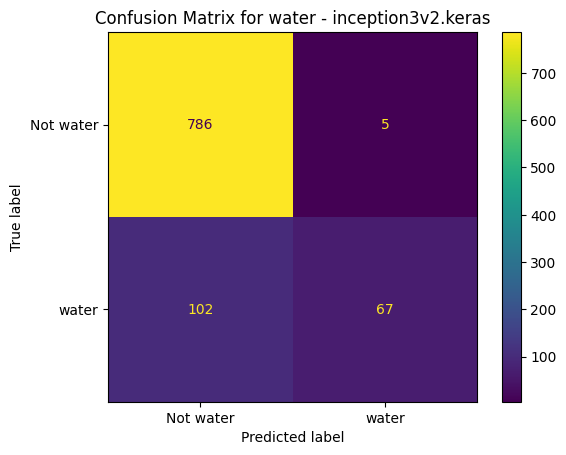

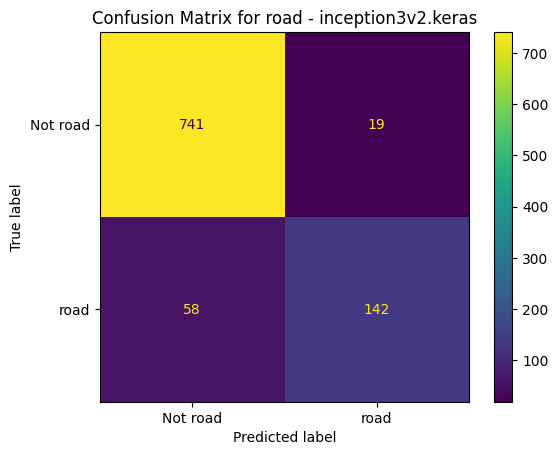

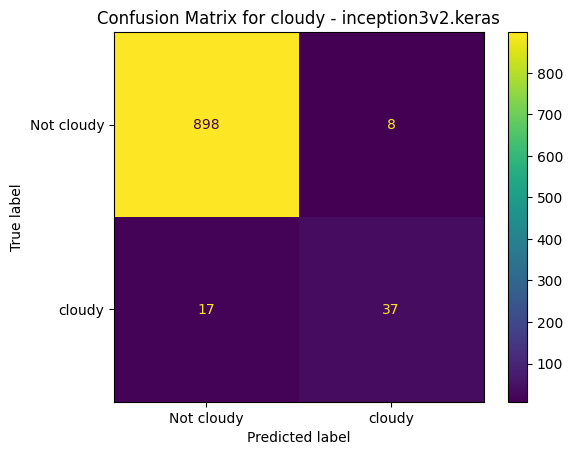

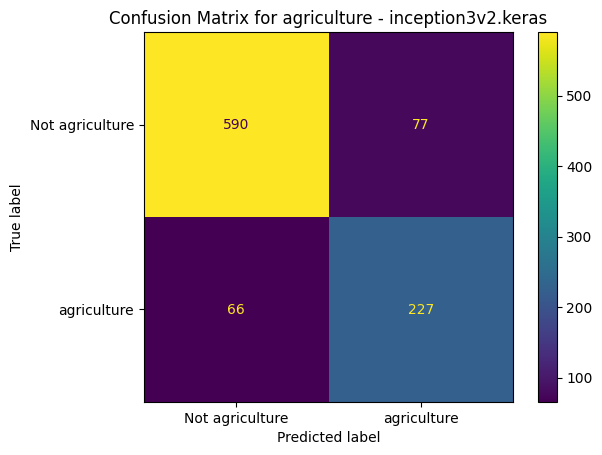

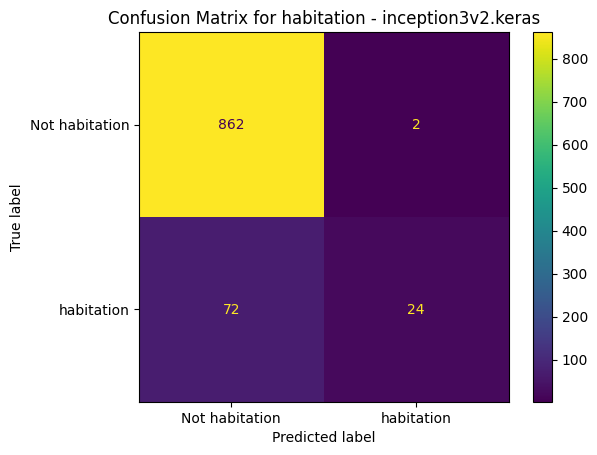

In [9]:


calc_res(models[0], model_files[0])

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 400ms/step


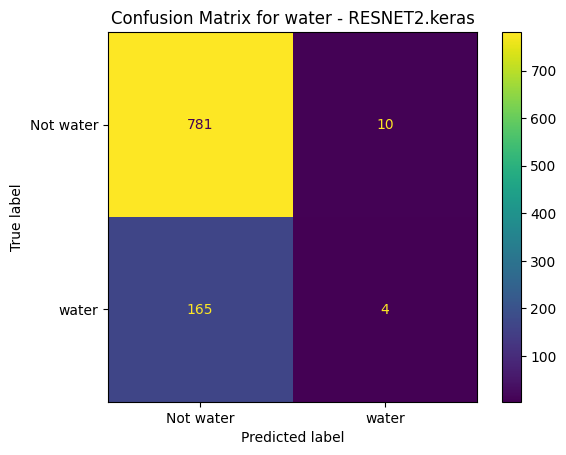

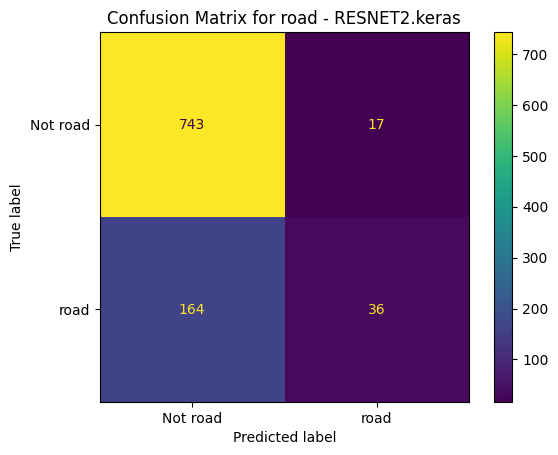

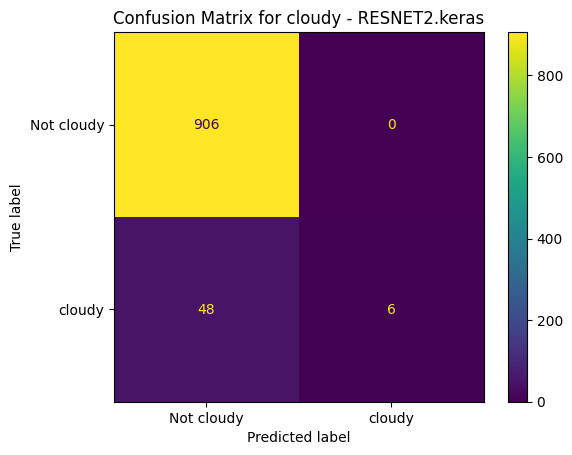

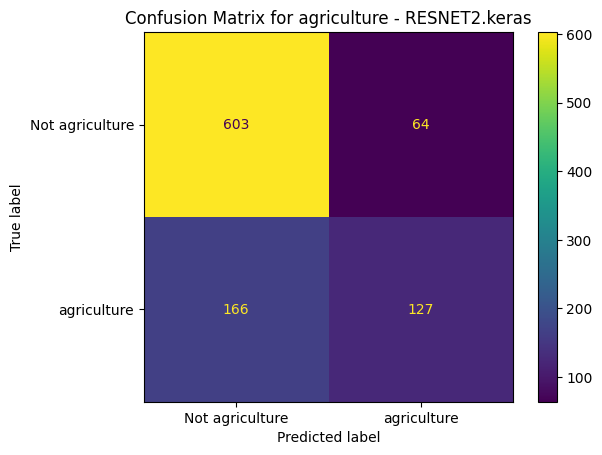

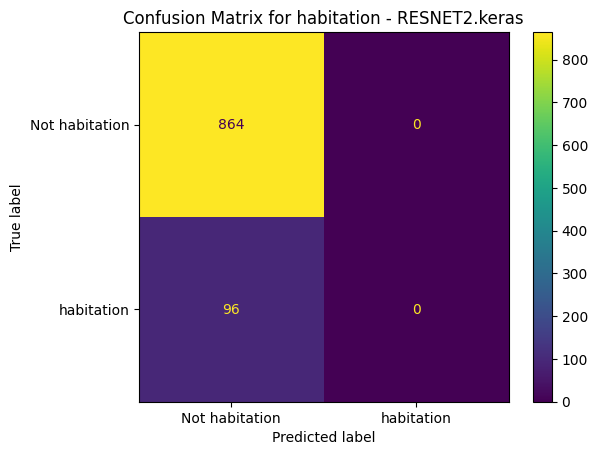

In [10]:
# X_valid = np.array([cv2.resize(img, (128, 128)) for img in X_valid])
calc_res(models[2], model_files[2])

30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step


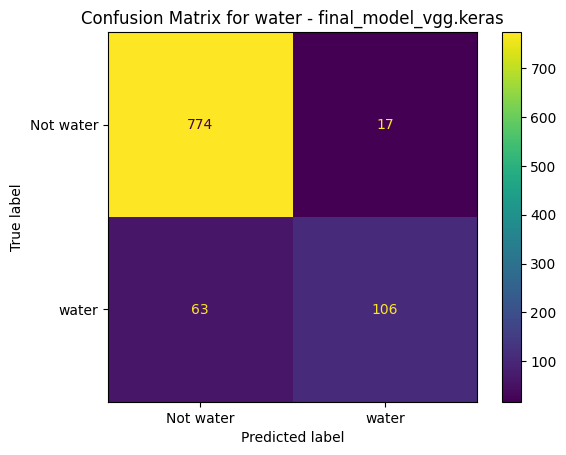

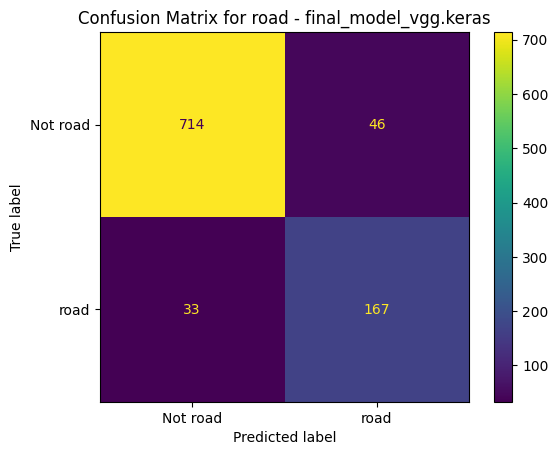

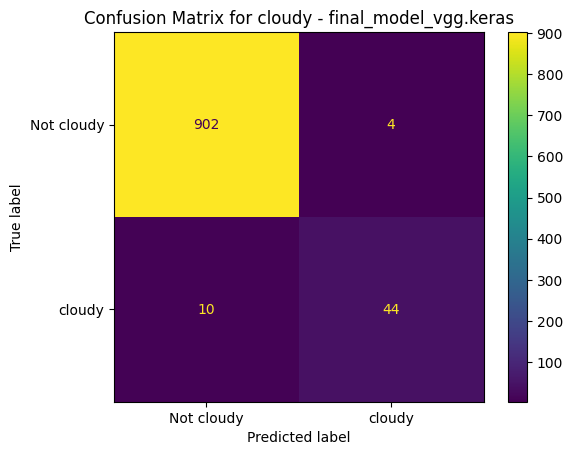

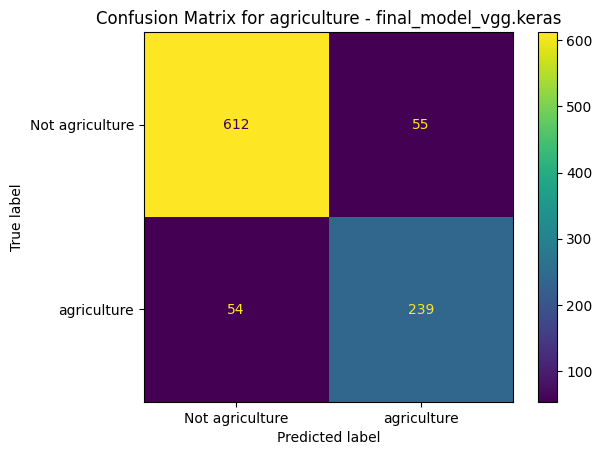

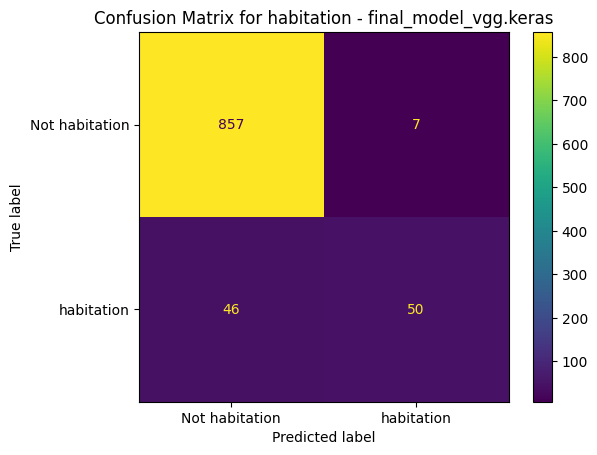

In [11]:
# X_valid = np.array([cv2.resize(img, (128, 128)) for img in X_valid])
calc_res(models[1], model_files[1])


In [12]:
import pandas as pd

results_list = []

# for model_file in model_files:
#         results_list.append({
#             'Model': model_file,
#             'Class': class_name,
#             'F1 Score': f1,
#             'Accuracy': acc
#         })

df_results = pd.DataFrame(results)

df_results


,inception3v2.keras,final_model_vgg.keras,RESNET2.keras
F_beta score,[0.8263811375311784],[0.8812272402695243],[0.6864024382172715]
Accuracy,[0.54375],[0.61875],[0.36770833333333336]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


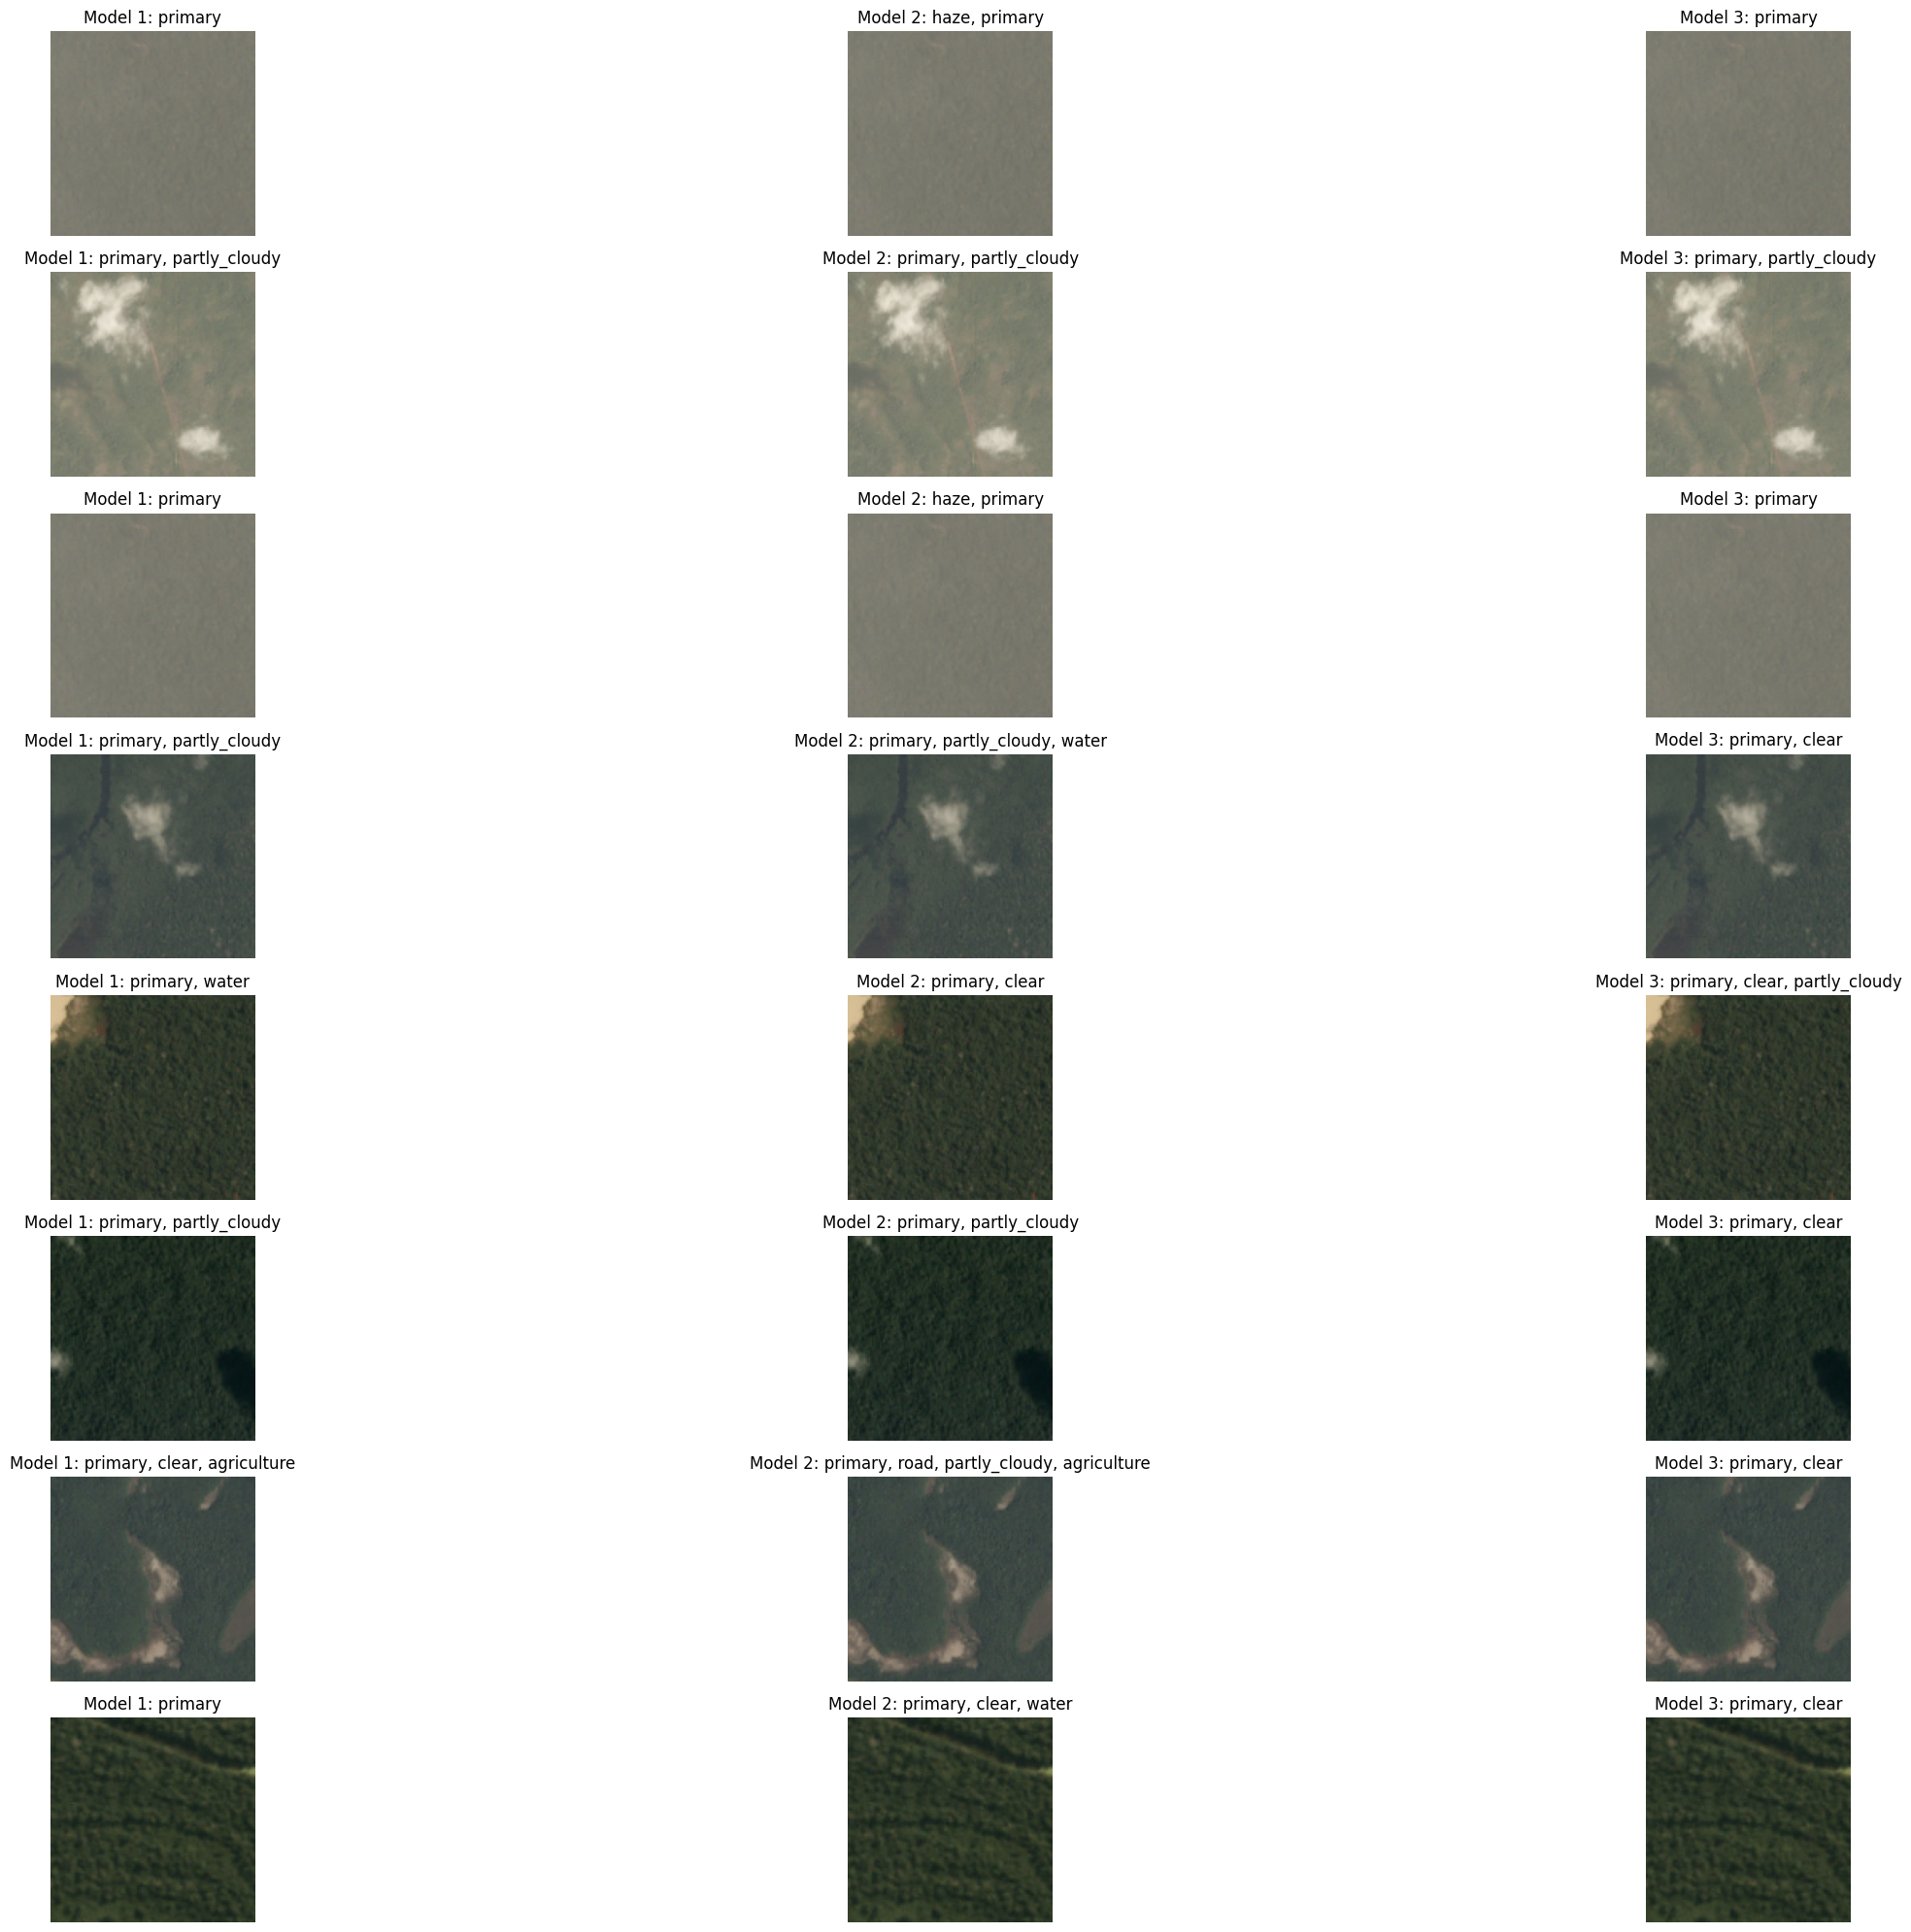

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_paths = ['./train-jpg/train_196.jpg','./train-jpg/train_74.jpg','./train-jpg/train_196.jpg', './train-jpg/train_1970.jpg', './train-jpg/train_10112.jpg', './train-jpg/train_34512.jpg', './train-jpg/train_18236.jpg', './train-jpg/train_10500.jpg'] 

def plot_images_with_predictions(models, img_paths):
    num_models = len(models)
    num_images = len(img_paths)
    
    fig, axes = plt.subplots(num_images, num_models, figsize=(30, 20)) 
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        
        for j, model in enumerate(models):
            predictions = model.predict(img_array)
            predicted_classes = (predictions > 0.5).astype(int)[0]
            class_names = [labels[k] for k in range(len(predicted_classes)) if predicted_classes[k] > 0]
            
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Model {j+1}: {', '.join(class_names) if class_names else 'None'}")

    plt.tight_layout()
    plt.show()

plot_images_with_predictions(models, img_paths)